In [320]:
import datetime, time
import numpy as np
import pandas as pd
from scipy import stats
import os
import subprocess

In [321]:
#Company to evaluate
company = 'XRX'

#List of the prediction IDs
fname = "Prediction_IDs_"+str(company)+".csv"
fname = os.path.join('./sims_final', fname)

ids = np.genfromtxt(fname, delimiter=',', dtype=None)

#Prepare lists to store simulation results
samples = ids.size
states = []
for i in range(0,12):
    states.append(np.zeros(samples))

In [322]:
#values for initial test
threshold = 0.5
th = 0.42

In [49]:
n=0
e=0

pd.options.display.float_format = '{:,.4f}'.format

for i in xrange(samples):

    try:
        fname = "Predictions_" + company + "_States_1_" + str(int(ids[i])) + "_stats.csv"
        data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
        err = data[2]
        var = data[4]
        med = data[5]
        stop = data[3]
        avg_pr1 = data[0]
        rp = data[1]
        stp = rp[0]
        
        if (err.size >1):
            
            stop = stop[-1]
            
            if ((int(np.log(th)/np.log(stop)))>=364):
                print("Continued!!")
                continue
            
            if (stop ==1):
                stop = -1
            else:
                stop = int(np.log(threshold)/np.log(stop))

                
            err = err[stop]
            var =  var[stop]
            med = med[stop]
            avg_pr1 = avg_pr1[stop]
            rp = rp[stop]
            
        states[0][n] = err
        states[2][n] = var
        states[4][n] = med

        
        
        
        
        
        
        fname = "Predictions_" + company + "_States_5_" + str(int(ids[i])) + "_stats.csv"
        data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
        err = data[2]
        var = data[4]
        med = data[5]
        stop = data[3]
        avg_pr5 = data[0]
        
        if (err.size >1):
            
            stop = stop[-1]
            
            if ((int(np.log(th)/np.log(stop)))>=364):
                continue
            
            if (stop ==1):
                stop = -1
            else:
                stop = int(np.log(threshold)/np.log(stop))
                
                
            err = err[stop]
            var =  var[stop]
            med = med[stop]
            avg_pr5 = avg_pr5[stop]
        
            
        states[1][n] = err
        states[3][n] = var
        states[5][n] = med
        
        states[6][n] = rp
        states[7][n] = avg_pr1
        states[8][n] = avg_pr5
        
        states[10][n] = stp
        
        n=n+1

    except:
        e = e+1
    



170
130


In [50]:
for i in range(0,12):
    states[i] = states[i][:n]

In [51]:
dfr = pd.DataFrame({  
                    'err1' : states[0]/states[6],
                    'err5' : states[1]/states[6],
                    'error 1 state' : np.absolute(states[0]/states[6]),
                    'error 5 states' : np.absolute(states[1]/states[6]),
                    'sqe 1 state' : np.square(states[0]/states[6]),
                    'sqe 5 states' : np.square(states[1]/states[6]),
                    'var 1 state' : states[2]/states[6],
                    'var 5 states' : states[3]/states[6],
                    'median 1 state' : np.absolute(states[4]-states[6]),
                    'median 5 states' : np.absolute(states[5]-states[6]),
                    'delta': np.absolute(states[0]/states[6]) - np.absolute(states[1]/states[6]),
                    'start price error':np.absolute(states[10]-states[6])/states[6],
                     })

In [83]:
#function to graph MAE by probability
def prob_graph(threshold):
    n=0
    for i in xrange(samples):

        try:
            fname = "Predictions_" + company + "_States_1_" + str(int(ids[i])) + "_stats.csv"
            data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
            err = data[2]
            var = data[4]
            med = data[5]
            stop = data[3]
            avg_pr1 = data[0]
            rp = data[1]
            stp = rp[0]

            if (err.size >1):

                stop = stop[-1]
                if ((int(np.log(th)/np.log(stop)))>=364):
                    print ("continued!!")
                    continue

                if (stop ==1):
                    stop = -1
                else:
                    stop = int(np.log(threshold)/np.log(stop))


                err = err[stop]
                var =  var[stop]
                med = med[stop]
                avg_pr1 = avg_pr1[stop]
                rp = rp[stop]

            states[0][n] = err
            states[2][n] = var
            states[4][n] = med



            fname = "Predictions_" + company + "_States_5_" + str(int(ids[i])) + "_stats.csv"
            data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
            err = data[2]
            var = data[4]
            med = data[5]
            stop = data[3]
            avg_pr5 = data[0]

            if (err.size >1):

                stop = stop[-1]
                if ((int(np.log(th)/np.log(stop)))>=364):
                    continue

                if (stop ==1):
                    stop = -1
                else:
                    stop = int(np.log(threshold)/np.log(stop))

                err = err[stop]
                var =  var[stop]
                med = med[stop]
                avg_pr5 = avg_pr5[stop]


            states[1][n] = err
            states[3][n] = var
            states[5][n] = med

            states[6][n] = rp
            states[7][n] = avg_pr1
            states[8][n] = avg_pr5
            
            
            if (stop == -1):
                stop = 1
            
            states[9][n] = stop
            stop_avg = np.mean(states[9])

            states[10][n] = stp
            
            n=n+1

        except:

            pass
    
    for i in range(0,12):
        states[i] = states[i][:n]
    
    e0 = np.absolute(states[10]-states[6])/states[6]
    
    e1 = np.absolute(states[0]/states[6])
    e5 = np.absolute(states[1]/states[6])
    
    s_val, p_val = stats.wilcoxon(e1,e5)
       
    mse =  (np.sqrt(np.average(np.square(e0))),
        np.sqrt(np.average(np.square(e1))), 
        np.sqrt(np.average(np.square(e5))), 
           stop_avg) 
        
 
        
    abs_err = (np.average(e0), np.average(e1), np.average(e5), stop_avg, 
               np.var(e0),
               np.var(e1),
               np.var(e5))
        
    return abs_err, mse, p_val
    
    

In [84]:
def gr(x):
    return [prob_graph(e) for e in x]

In [ ]:
x = np.linspace(0.1,1,45)
result = gr(x)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [86]:
#break results into component arrays
r_len = len(result)
result_avg = [result[i][0] for i in xrange(r_len)]
result_mse = [result[i][1] for i in xrange(r_len)]
result_pval = [result[i][2] for i in xrange(r_len)]
result_pval = np.array(result_pval)

In [87]:
d_gr = [result_avg[j][3] for j in range(r_len)]

In [ ]:
lims = np.where(result_pval <= 0.05)

In [89]:
#prepare results before graphing
gr0 = [result_avg[j][0] for j in range(r_len)]
gr1 = [result_avg[j][1] for j in range(r_len)]
gr5 = [result_avg[j][2] for j in range(r_len)]
err0 = [result_avg[j][4] for j in range(r_len)]
err1 = [result_avg[j][5] for j in range(r_len)]
err5 = [result_avg[j][6] for j in range(r_len)]

In [90]:
gr0 = np.array(gr0)
gr1 = np.array(gr1)
gr5 = np.array(gr5)

In [91]:
import matplotlib.ticker as mticker

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [323]:
#function to graph MAE by days
def days_graph(num_days):
    n=0
    for i in xrange(samples):

        try:
            fname = "Predictions_" + company + "_States_1_" + str(int(ids[i])) + "_stats.csv"
            data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
            err = data[2]
            var = data[4]
            med = data[5]
            stop = num_days
            avg_pr1 = data[0]
            rp = data[1]
            stp = rp[0]

            if (err.size >1):

                err = err[stop]
                var =  var[stop]
                med = med[stop]
                avg_pr1 = avg_pr1[stop]
                rp = rp[stop]

            states[0][n] = err
            states[2][n] = var
            states[4][n] = med



            fname = "Predictions_" + company + "_States_5_" + str(int(ids[i])) + "_stats.csv"
            data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
            err = data[2]
            var = data[4]
            med = data[5]

            avg_pr5 = data[0]

            if (err.size >1):

                err = err[stop]
                var =  var[stop]
                med = med[stop]
                avg_pr5 = avg_pr5[stop]


            states[1][n] = err
            states[3][n] = var
            states[5][n] = med

            states[6][n] = rp
            states[7][n] = avg_pr1
            states[8][n] = avg_pr5

            states[10][n] = stp
            
            n=n+1

        except:

            pass
    

    for i in range(0,12):
        states[i] = states[i][:n]
    
    e0 = np.absolute(states[10]-states[6])/states[6]
    
    e1 = np.absolute(states[0]/states[6])
    e5 = np.absolute(states[1]/states[6])     
 
        
    abs_err = (np.average(e0), np.average(e1), np.average(e5),  
               np.var(e0),
               np.var(e1),
               np.var(e5))
        
    return abs_err

In [324]:
days_graph(1)

(0.015838762563852114,
 0.015855153585058852,
 0.015978565289106107,
 0.00031723357922275487,
 0.00031918865007280503,
 0.00031265688993243056)

In [325]:
def gr_days(x):
    return [days_graph(e) for e in x]

In [326]:
print(data.shape[1])

15


In [327]:
x_days = range(1,4,1)

result_days = gr_days(x_days)

In [328]:
len(result_days)

3

In [329]:
r_len_days = len(result_days)
gr0_days = [result_days[j][0] for j in range(r_len_days)]
gr1_days = [result_days[j][1] for j in range(r_len_days)]
gr5_days = [result_days[j][2] for j in range(r_len_days)]
err0_days = [result_days[j][3] for j in range(r_len_days)]
err1_days = [result_days[j][4] for j in range(r_len_days)]
err5_days = [result_days[j][5] for j in range(r_len_days)]

err0_days=np.array(err0_days)
err1_days=np.array(err1_days)
err5_days=np.array(err5_days)

gr0_days = np.array(gr0_days)
gr1_days = np.array(gr1_days)
gr5_days = np.array(gr5_days)

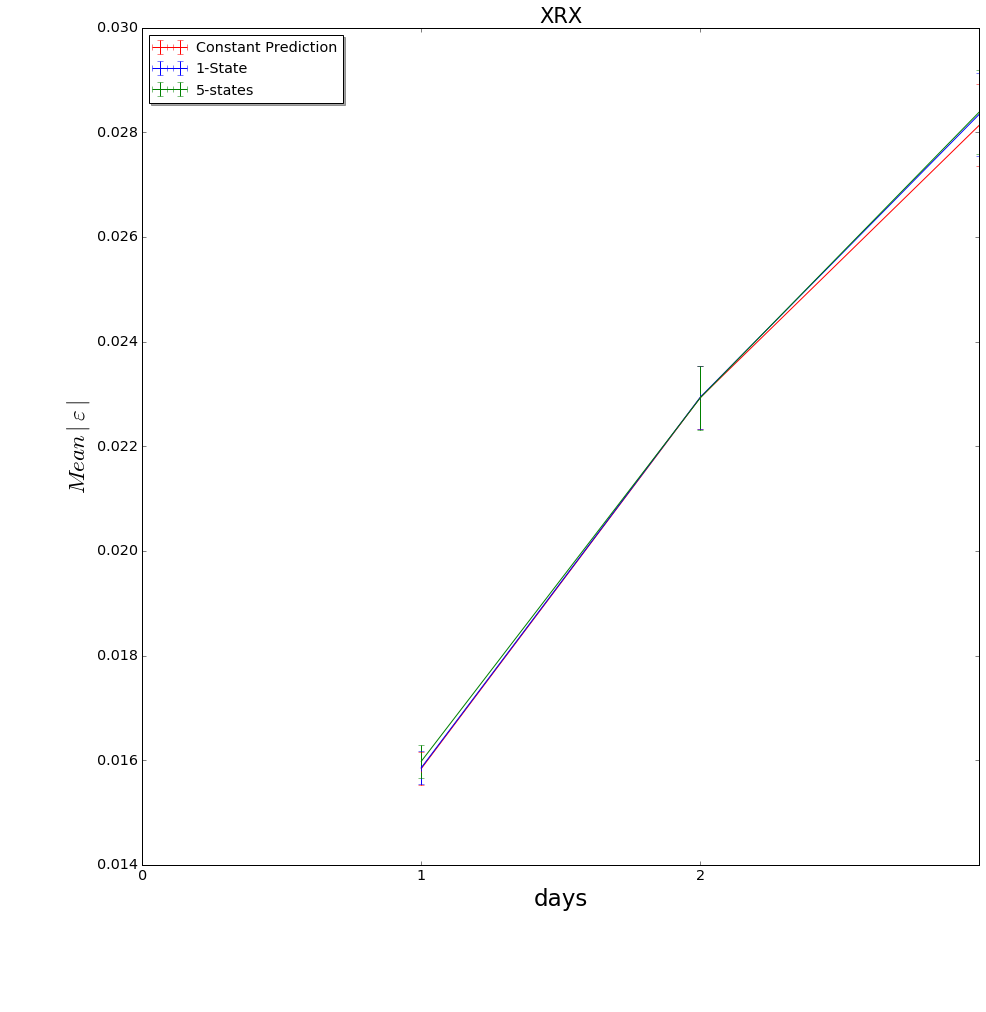

In [330]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.title(str(company), fontsize=21)
plt.ylabel(r'$Mean \mid \varepsilon \mid$', fontsize=23)
plt.xlabel("days", fontsize=23)
plt.errorbar(x_days,gr0_days, xerr=0.0, yerr=err0_days, label='Constant Prediction',color="red")
plt.errorbar(x_days,gr1_days, xerr=0.0, yerr=err1_days, label='1-State',color="blue")
plt.errorbar(x_days,gr5_days, xerr=0.0, yerr=err5_days, label='5-states',color="green")
plt.legend(loc='best', shadow=True)
plt.xticks(np.arange(0, 3, 1.0))
plt.annotate('1-day normalised errors: \n \nconstant prediction:'+'{:3.6f}'.format(days_graph(1)[0])+
             '\none-state prediction:'+'{:3.6f}'.format(days_graph(1)[1]) + 
             '\nfive-states prediction:'+'{:3.6f}'.format(days_graph(1)[2]), 
            xy=(1, .011), xytext=(.13, .013), fontsize=23,
            arrowprops=dict(facecolor='grey', shrink=0.03),
            )
plt.savefig('Accuracy_days_'+str(company)+'_3_days.png',bbox_inches='tight')
plt.show()


In [85]:
import gmodel_final
import makepredictions_final
import random

company = 'AMZN'

num_tests = 2000
d_f = 120

date1 = datetime.date(2000, 1, 1)
date2 = datetime.date(2011, 1, 1) + datetime.timedelta(days=19)

id_file1 = random.randint(1000000,9000000)
id_file5 = random.randint(1000000,9000000)


d,t = gmodel_final.cmodel(company,date1,date2,1)
filename = company + "_1_states_model_final.pkl"
filename = os.path.join('./sims_final', filename)
makepredictions_final.predictions_mls(filename, company, date1,date2, 1, num_tests, d_f,t, id_file1)

d,t = gmodel_final.cmodel(company,date1,date2,5)
filename = company + "_5_states_model_final.pkl"
filename = os.path.join('./sims_final', filename)
makepredictions_final.predictions_mls(filename, company, date1,date2, 5, num_tests, d_f,t, id_file5)

Start Price:  181.960007 Avg. Prediction:  1 states: 184.692450483  Real Price: 198.649994
 Error end of predictions: -13.9575435167 Delta Start-End: -16.689987 

Start Price:  181.960007 Avg. Prediction:  5 states: 185.349873129  Real Price: 198.649994
 Error end of predictions: -13.3001208708 Delta Start-End: -16.689987 



In [86]:
fname = "Predictions_" + company + "_States_1_" + str(id_file1) + "_stats.csv"
data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
e1 = data[2]
v1 = data[4]
m1 = data[5]
avg_pr1 = data[0]
rp1 = data[1]
sp1 = rp1[0]

In [87]:
fname = "Predictions_" + company + "_States_5_" + str(id_file5) + "_stats.csv"
data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
e5 = data[2]
v5 = data[4]
m5 = data[5]
avg_pr5 = data[0]
rp5 = data[1]
sp5 = rp5[0]

In [88]:
days=42
date0 = date2 - datetime.timedelta(days)
past_prices = makepredictions_final.getrealprice_series(company, date0,days)

In [89]:
x_past = range(-len(past_prices),0)
x_past = np.array(x_past) + 1

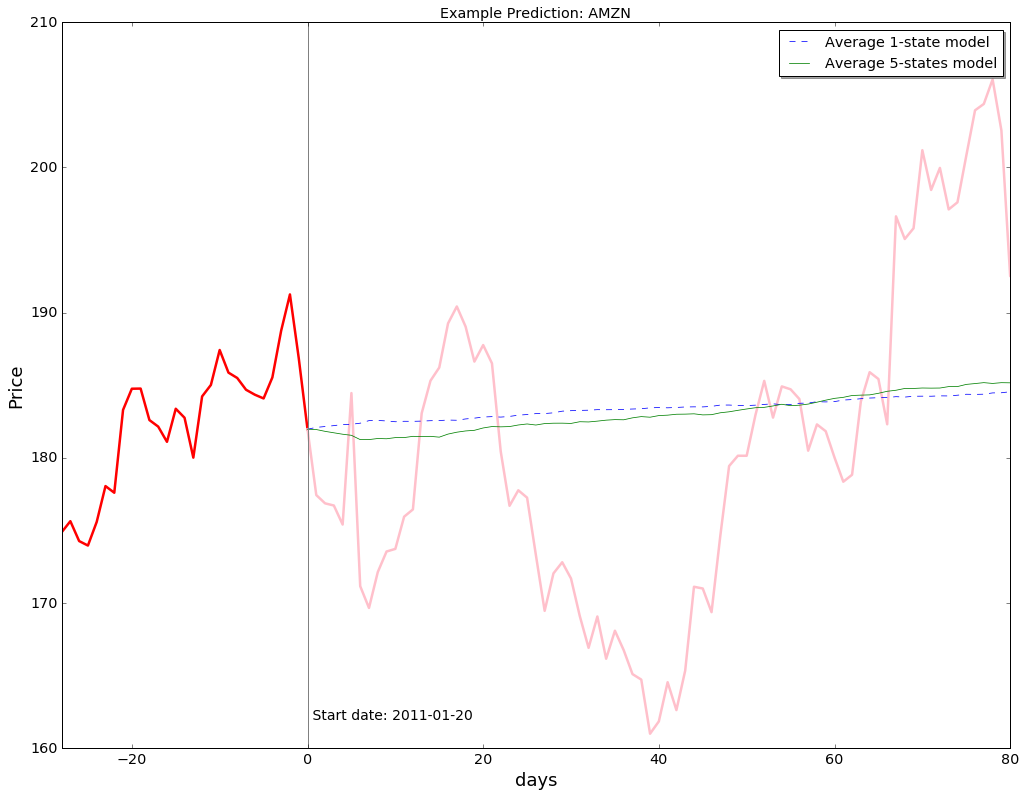

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 13))
plt.title("Example Prediction: " + str(company))
plt.ylabel("Price", fontsize=18)
plt.xlabel("days", fontsize=18)
plt.plot(x_past,past_prices, color="red", linewidth=2.5)
plt.plot(rp5, color="pink", linewidth=2.5)
plt.plot(avg_pr1, color="blue", label="Average 1-state model",linewidth=.75, linestyle="--")
plt.plot(avg_pr5, color="green", label="Average 5-states model",linewidth=.75, linestyle="-")
plt.axvline(x=0.0, color="grey")
#for r in xrange(20):
#    one_run = makepredictions_final.predict_one(filename, company, date1,date2, 1, d_f,t)
#    plt.plot(one_run,color="blue", linewidth=.75, linestyle="--",alpha=0.94)
#for r in xrange(20):
#    other_run = makepredictions_final.predict_one(filename, company, date1,date2, 5, d_f,t)
#    plt.plot(other_run,color="green", linewidth=.75, linestyle="--",alpha=0.99)
plt.legend(loc='best', shadow=True)
plt.xlim([-28,80])
#plt.ylim([0,37])
plt.annotate(' Start date: '+ str(date2), xy=(0, 170), xytext=(0, 162), fontsize=14)
plt.savefig('AMZN_Prediction_Example.png',bbox_inches='tight')
plt.show()

In [91]:
company = 'AAPL'

num_tests = 2000
d_f = 120

date1 = datetime.date(2000, 1, 1)
date2 = datetime.date(2011, 1, 1) + datetime.timedelta(days=19)

id_file1 = random.randint(1000000,9000000)
id_file5 = random.randint(1000000,9000000)


d,t = gmodel_final.cmodel(company,date1,date2,1)
filename = company + "_1_states_model_final.pkl"
filename = os.path.join('./sims_final', filename)
makepredictions_final.predictions_mls(filename, company, date1,date2, 1, num_tests, d_f,t, id_file1)

d,t = gmodel_final.cmodel(company,date1,date2,5)
filename = company + "_5_states_model_final.pkl"
filename = os.path.join('./sims_final', filename)
makepredictions_final.predictions_mls(filename, company, date1,date2, 5, num_tests, d_f,t, id_file5)

Start Price:  43.510998 Avg. Prediction:  1 states: 44.7497798705  Real Price: 43.843204
 Error end of predictions: 0.906575870525 Delta Start-End: -0.332206 

Start Price:  43.510998 Avg. Prediction:  5 states: 44.2886519188  Real Price: 43.843204
 Error end of predictions: 0.445447918762 Delta Start-End: -0.332206 



In [92]:
fname = "Predictions_" + company + "_States_1_" + str(id_file1) + "_stats.csv"
data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
e1 = data[2]
v1 = data[4]
m1 = data[5]
avg_pr1 = data[0]
rp1 = data[1]
sp1 = rp1[0]

fname = "Predictions_" + company + "_States_5_" + str(id_file5) + "_stats.csv"
data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
e5 = data[2]
v5 = data[4]
m5 = data[5]
avg_pr5 = data[0]
rp5 = data[1]
sp5 = rp5[0]

days=42
date0 = date2 - datetime.timedelta(days)
past_prices = makepredictions_final.getrealprice_series(company, date0,days)

x_past = range(-len(past_prices),0)
x_past = np.array(x_past) + 1

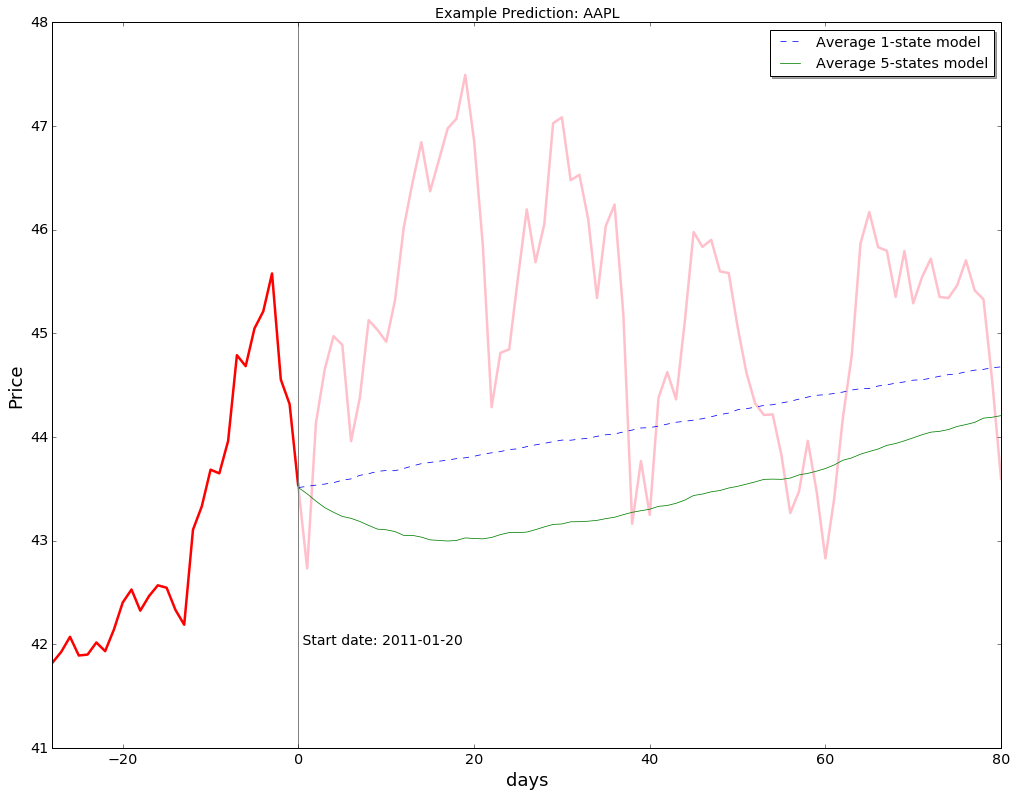

In [93]:
plt.figure(figsize=(17, 13))
plt.title("Example Prediction: " + str(company))
plt.ylabel("Price", fontsize=18)
plt.xlabel("days", fontsize=18)
plt.plot(x_past,past_prices, color="red", linewidth=2.5)
plt.plot(rp5, color="pink", linewidth=2.5)
plt.plot(avg_pr1, color="blue", label="Average 1-state model",linewidth=.75, linestyle="--")
plt.plot(avg_pr5, color="green", label="Average 5-states model",linewidth=.75, linestyle="-")
plt.axvline(x=0.0, color="grey")
#for r in xrange(20):
#    one_run = makepredictions_final.predict_one(filename, company, date1,date2, 1, d_f,t)
#    plt.plot(one_run,color="blue", linewidth=.75, linestyle="--",alpha=0.94)
#for r in xrange(20):
#    other_run = makepredictions_final.predict_one(filename, company, date1,date2, 5, d_f,t)
#    plt.plot(other_run,color="green", linewidth=.75, linestyle="--",alpha=0.99)
plt.legend(loc='best', shadow=True)
plt.xlim([-28,80])
#plt.ylim([0,37])
plt.annotate(' Start date: '+ str(date2), xy=(0, 42), xytext=(0, 42), fontsize=14)
plt.savefig(str(company)+'_Prediction_Example.png',bbox_inches='tight')
plt.show()

In [94]:
company = 'GOOGL'

num_tests = 2000
d_f = 120

date1 = datetime.date(2000, 1, 1)
date2 = datetime.date(2011, 1, 1) + datetime.timedelta(days=19)

id_file1 = random.randint(1000000,9000000)
id_file5 = random.randint(1000000,9000000)


d,t = gmodel_final.cmodel(company,date1,date2,1)
filename = company + "_1_states_model_final.pkl"
filename = os.path.join('./sims_final', filename)
makepredictions_final.predictions_mls(filename, company, date1,date2, 1, num_tests, d_f,t, id_file1)

d,t = gmodel_final.cmodel(company,date1,date2,5)
filename = company + "_5_states_model_final.pkl"
filename = os.path.join('./sims_final', filename)
makepredictions_final.predictions_mls(filename, company, date1,date2, 5, num_tests, d_f,t, id_file5)

Start Price:  313.698704 Avg. Prediction:  1 states: 328.945697131  Real Price: 262.277286
 Error end of predictions: 66.6684111312 Delta Start-End: 51.421418 

Start Price:  313.698704 Avg. Prediction:  5 states: 338.247870439  Real Price: 262.277286
 Error end of predictions: 75.9705844391 Delta Start-End: 51.421418 



In [95]:
fname = "Predictions_" + company + "_States_1_" + str(id_file1) + "_stats.csv"
data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
e1 = data[2]
v1 = data[4]
m1 = data[5]
avg_pr1 = data[0]
rp1 = data[1]
sp1 = rp1[0]

fname = "Predictions_" + company + "_States_5_" + str(id_file5) + "_stats.csv"
data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
e5 = data[2]
v5 = data[4]
m5 = data[5]
avg_pr5 = data[0]
rp5 = data[1]
sp5 = rp5[0]

days=42
date0 = date2 - datetime.timedelta(days)
past_prices = makepredictions_final.getrealprice_series(company, date0,days)

x_past = range(-len(past_prices),0)
x_past = np.array(x_past) + 1

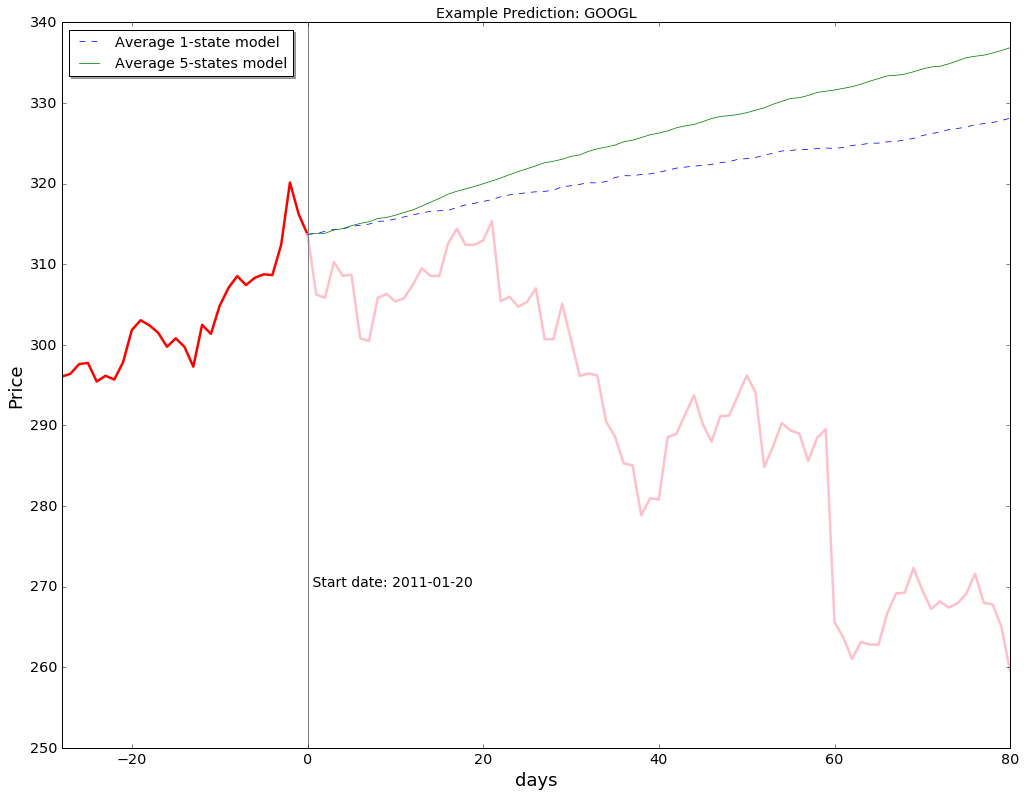

In [96]:
plt.figure(figsize=(17, 13))
plt.title("Example Prediction: " + str(company))
plt.ylabel("Price", fontsize=18)
plt.xlabel("days", fontsize=18)
plt.plot(x_past,past_prices, color="red", linewidth=2.5)
plt.plot(rp5, color="pink", linewidth=2.5)
plt.plot(avg_pr1, color="blue", label="Average 1-state model",linewidth=.75, linestyle="--")
plt.plot(avg_pr5, color="green", label="Average 5-states model",linewidth=.75, linestyle="-")
plt.axvline(x=0.0, color="grey")
#for r in xrange(20):
#    one_run = makepredictions_final.predict_one(filename, company, date1,date2, 1, d_f,t)
#    plt.plot(one_run,color="blue", linewidth=.75, linestyle="--",alpha=0.94)
#for r in xrange(20):
#    other_run = makepredictions_final.predict_one(filename, company, date1,date2, 5, d_f,t)
#    plt.plot(other_run,color="green", linewidth=.75, linestyle="--",alpha=0.99)
plt.legend(loc='best', shadow=True)
plt.xlim([-28,80])
#plt.ylim([0,37])
plt.annotate(' Start date: '+ str(date2), xy=(0, 270), xytext=(0, 270), fontsize=14)
plt.savefig(str(company)+'_Prediction_Example.png',bbox_inches='tight')
plt.show()

In [357]:
company = 'XRX'

fname = "Prediction_IDs_"+str(company)+".csv"
fname = os.path.join('./sims_final', fname)


ids = np.genfromtxt(fname, delimiter=',', dtype=None)


samples = ids.size
states = []
for i in range(0,12):
    states.append(np.zeros(samples))

In [365]:
#function to simulate investment
def invest_days(num_days):
    n=0
    for i in xrange(samples):

        try:
            fname = "Predictions_" + company + "_States_1_" + str(int(ids[i])) + "_stats.csv"
            data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
            err = data[2]
            var = data[4]
            med = data[5]
            stop = num_days
            avg_pr1 = data[0]
            rp = data[1]
            stp = rp[0]

            if (err.size >1):

                err = err[stop]
                var =  var[stop]
                med = med[stop]
                avg_pr1 = avg_pr1[stop]
                rp = rp[stop]

            states[0][n] = err
            states[2][n] = var
            states[4][n] = med



            fname = "Predictions_" + company + "_States_5_" + str(int(ids[i])) + "_stats.csv"
            data = np.genfromtxt(os.path.join('./sims_final', fname), delimiter=',', dtype=None)
            err = data[2]
            var = data[4]
            med = data[5]

            avg_pr5 = data[0]

            if (err.size >1):

                err = err[stop]
                var =  var[stop]
                med = med[stop]
                avg_pr5 = avg_pr5[stop]


            states[1][n] = err
            states[3][n] = var
            states[5][n] = med

            states[6][n] = rp
            states[7][n] = avg_pr1
            states[8][n] = avg_pr5

            states[10][n] = stp
            
            n=n+1

        except:
            pass
            #print("some error here!")
    

    for i in range(0,12):
        states[i] = states[i][:n]



    dfr = pd.DataFrame({  
                        'err1' : states[0]/states[6],
                        'err5' : states[1]/states[6],
                        'error 1 state' : np.absolute(states[0]/states[6]),
                        'error 5 states' : np.absolute(states[1]/states[6]),
                        'sqe 1 state' : np.square(states[0]/states[6]),
                        'sqe 5 states' : np.square(states[1]/states[6]),
                        'median 1 state' : np.absolute(states[4]-states[6]),
                        'median 5 states' : np.absolute(states[5]-states[6]),
                        'delta': np.absolute(states[0]/states[6]) - np.absolute(states[1]/states[6]),
                        'start price error':np.absolute(states[6]-states[10])/states[6],
                        'expected gain1': states[7]>states[10],
                        'expected gain5': states[8]>states[10],
                        'normalised real gain/loss': (states[6]-states[10])/states[10],
                         })

    invest1 = dfr[dfr['expected gain1'] == True]['normalised real gain/loss'].values
    gain1 = np.sum(invest1)
    companies_inv1 = invest1.size

    invest5 = dfr[dfr['expected gain5'] == True]['normalised real gain/loss'].values
    gain5 = np.sum(invest5)
    companies_inv5 = invest5.size

    do_not_invest5 = dfr[dfr['expected gain5'] == False]['normalised real gain/loss'].values

    alt_gain5 = np.sum(do_not_invest5)

    companies_alt5 = do_not_invest5.size

    return gain5, companies_inv5, alt_gain5, companies_alt5, gain1, companies_inv1

In [366]:
invest_days(3)

(0.80471611290075451, 240, -0.82119101868898203, 60, -0.62210260401824002, 169)

In [367]:
def inv(m):
    return [invest_days(i) for i in m]

In [368]:
m = range(0,182,1)


result_m = inv(m)

In [372]:
m_len = len(result_m)
result_gain5 = np.array([result_m[i][0] for i in xrange(m_len)])
result_companies_inv5 = np.array([result_m[i][1] for i in xrange(m_len)])
result_alt_gain = np.array([result_m[i][2] for i in xrange(m_len)])
result_companies_alt = np.array([result_m[i][3] for i in xrange(m_len)])
result_gain1 = np.array([result_m[i][4] for i in xrange(m_len)])
result_companies_inv1 = np.array([result_m[i][5] for i in xrange(m_len)])

In [370]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

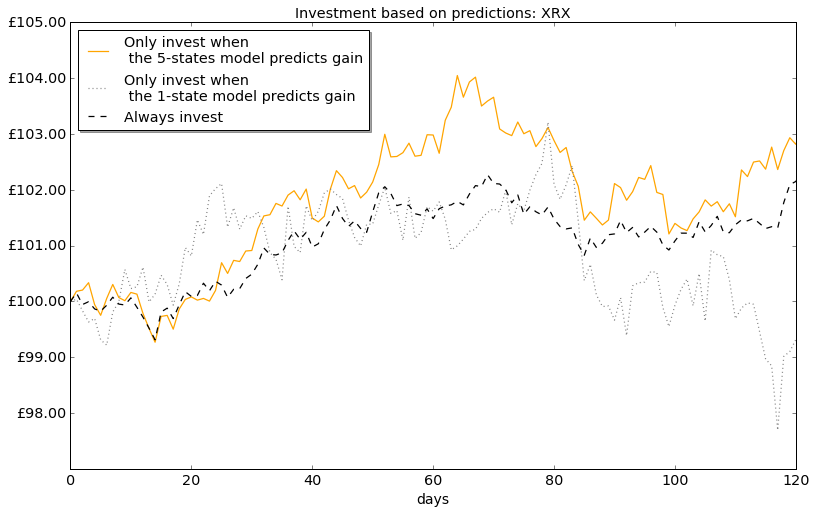

In [381]:

pound = u'\u00A3'
investment = 100
fig = plt.figure(figsize=(13,8))
plt.title("Investment based on predictions: " + str(company))
#plt.ylabel(pound, fontsize=18)
plt.xlabel("days", fontsize=14)
ax = fig.add_subplot(1, 1, 1)
ax.plot(m,investment*(1+result_gain5/result_companies_inv5),color="orange",linewidth=1.25, linestyle="-",
        label='Only invest when\n the 5-states model predicts gain')
ax.plot(m,investment*(1+result_gain1/result_companies_inv1),color="grey",linewidth=1.25, linestyle=":",
        label='Only invest when\n the 1-state model predicts gain')
ax.plot(m,investment*(1+(result_alt_gain+result_gain5)/(result_companies_inv5 + result_companies_alt)),color="black",
        linewidth=1.25, linestyle="--", label='Always invest')
plt.xlim([0,120])
#plt.xticks(np.arange(min(m), max(m), 10))
ax.yaxis.set_major_locator(mticker.MaxNLocator(prune='lower'))
ax.legend(loc='best', shadow=True)
vals = ax.get_yticks()
ax.set_yticklabels([u'\u00A3''{:3.2f}'.format(x) for x in vals])
plt.savefig('Investment_based_on_predictions_'+str(company)+'.png',bbox_inches='tight')
plt.show()